# **Unsupervised Learning Project: AllLife Bank Customer Segmentation**


Welcome to the project on Unsupervised Learning. We will be using **Credit Card Customer Data** for this project.

--------------------------------
## **Context** 
-------------------------------

**AllLife Bank wants to focus on its credit card customer base** in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. 

Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the operations team wants to upgrade the service delivery model, to ensure that customers' queries are resolved faster. The head of marketing and the head of delivery, both decide to reach out to the Data Science team for help.


----------------------------
## **Objective**
-----------------------------

**To identify different segments in the existing customer base**, taking into account their spending patterns as well as past interactions with the bank.

--------------------------
## **About the data**
--------------------------

Data is available on customers of the bank with their credit limit, the total number of credit cards the customer has, and different channels through which the customer has contacted the bank for any queries. These different channels include visiting the bank, online, and through a call center.

- **Sl_no** - Customer Serial Number
- **Customer Key** - Customer identification
- **Avg_Credit_Limit**	- Average credit limit (currency is not specified, you can make an assumption around this)
- **Total_Credit_Cards** - Total number of credit cards 
- **Total_visits_bank**	- Total bank visits
- **Total_visits_online** - Total online visits
- **Total_calls_made** - Total calls made

## **Importing libraries and overview of the dataset**

In [1]:
!pip install scikit-learn-extra


In [2]:
import pandas as pd

import numpy as np

import matplotlib.pylab as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture

from sklearn_extra.cluster import KMedoids

import warnings
warnings.filterwarnings("ignore")


### **Loading the data**

In [4]:
df = pd.read_excel('Credit+Card+Customer+Data.xlsx')

df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### **Data Overview**

- Observations
- Sanity checks




In [5]:
df.shape

(660, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [7]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [8]:
df.isna().sum() 

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [9]:
df.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [11]:
# Deleting duplicates in customer key
duplicate_keys = df['Customer Key'].duplicated()

duplicates = df[duplicate_keys] 

df = df.drop_duplicates(subset='Customer Key', keep='first')

In [12]:
df['Customer Key'].duplicated().sum()

0

In [13]:
df.drop(columns = 'Customer Key', inplace = True)
df.drop(columns = 'Sl_No', inplace = True)

In [14]:
df.shape

(655, 5)

In [15]:
df[df.duplicated()]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
295,10000,6,4,2,3
324,9000,4,5,0,4
361,18000,6,3,1,4
378,12000,6,5,2,1
385,8000,7,4,2,0
395,5000,4,5,0,1
455,47000,6,2,0,4


In [16]:
# Deleting duplicates in rows
df = df[~df.duplicated()]

In [17]:
df.shape

(644, 5)

## **Data Preprocessing and Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.
- Check and drop the duplicate customer keys
- Drop the variables that are not required for the analysis
- Check duplicate rows and remove them.


**Questions:**

1. How does the distribution and outliers look for each variable in the data?
2. How are the variables correlated with each other?

#### **Check the summary Statistics**

In [18]:
def boxplot(v, d, c, df):
    fig, axes = plt.subplots(1, 3, figsize=(12, 2)) 


    sns.boxplot(data=df, x=v, ax=axes[0])
    axes[0].set_title(f'Boxplot of {v}')

   
    sns.boxplot(data=df, x=d, ax=axes[1])
    axes[1].set_title(f'Boxplot of {d}')

 
    sns.boxplot(data=df, x=c, ax=axes[2])
    axes[2].set_title(f'Boxplot of {c}')
    
    

    plt.tight_layout()
    plt.show()

In [19]:
def boxplot2(v, d, df):
    fig, axes = plt.subplots(1, 2, figsize=(12, 2)) 


    sns.boxplot(data=df, x=v, ax=axes[0])
    axes[0].set_title(f'Boxplot of {v}')

   
    sns.boxplot(data=df, x=d, ax=axes[1])
    axes[1].set_title(f'Boxplot of {d}')
    
    plt.tight_layout()
    plt.show()

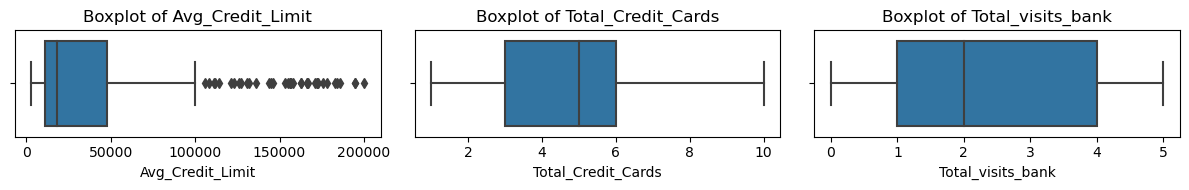

In [20]:
boxplot('Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', df)

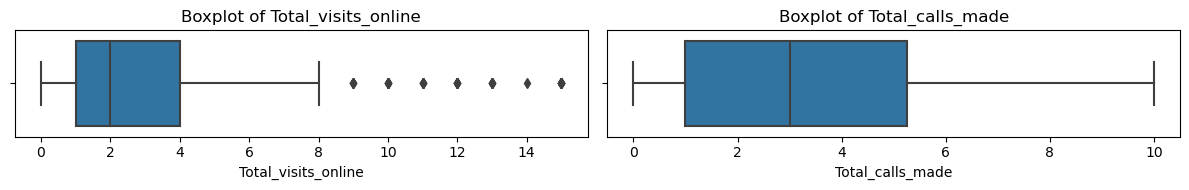

In [21]:
boxplot2('Total_visits_online', 'Total_calls_made', df)

In [22]:
def countplot(v, d, c, df):
    fig, axes = plt.subplots(1, 3, figsize=(12, 2)) 

    sns.countplot(data=df, x=v, ax=axes[0])
    axes[0].set_title(f'Countplot of {v}')

    sns.countplot(data=df, x=d, ax=axes[1])
    axes[1].set_title(f'Countplot of {d}')

    sns.countplot(data=df, x=c, ax=axes[2])
    axes[2].set_title(f'Countplot of {c}')

    plt.tight_layout()
    plt.show()

In [23]:
def countplot2(v, d, df):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 

    sns.countplot(data=df, x=v, ax=axes[0])
    axes[0].set_title(f'Countplot of {v}')

    sns.countplot(data=df, x=d, ax=axes[1])
    axes[1].set_title(f'Countplot of {d}')
    
    plt.tight_layout()
    plt.show()

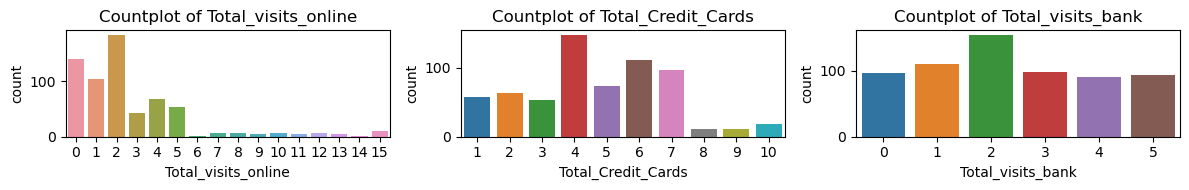

In [24]:
countplot('Total_visits_online', 'Total_Credit_Cards', 'Total_visits_bank', df)

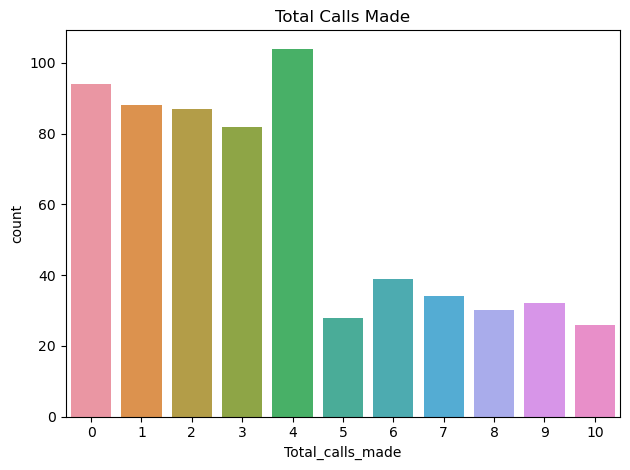

In [25]:
ax=sns.countplot(data=df, x='Total_calls_made')
ax.set_title('Total Calls Made')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Total_visits_online to Total_Credit_Cards')

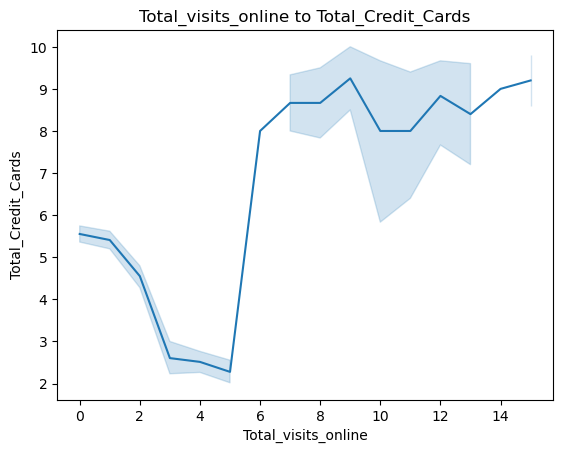

In [26]:
sns.lineplot(data=df, x='Total_visits_online', y='Total_Credit_Cards')
plt.title('Total_visits_online to Total_Credit_Cards')

Text(0.5, 1.0, 'Total Calls Made to Avg_Credit_Limit')

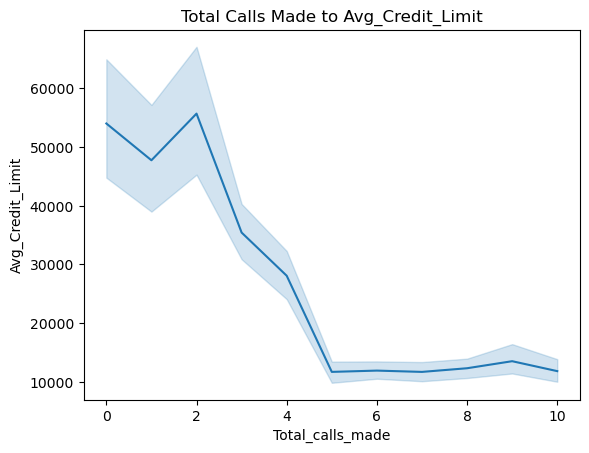

In [27]:
sns.lineplot(data=df, x ='Total_calls_made', y ='Avg_Credit_Limit')
plt.title('Total Calls Made to Avg_Credit_Limit')

Text(0.5, 1.0, 'Total Calls Made to Avg_Credit_Limit')

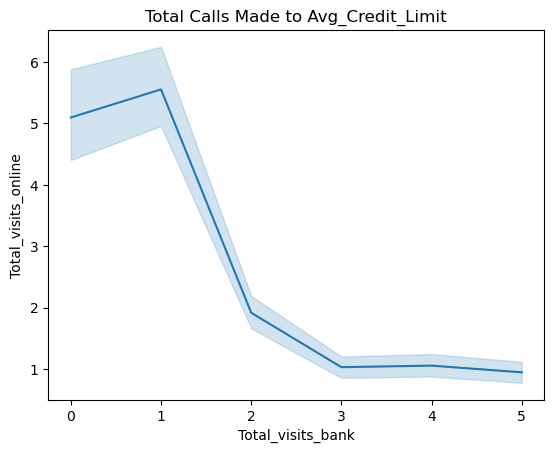

In [28]:
sns.lineplot(data=df, x ='Total_visits_bank', y ='Total_visits_online')
plt.title('Total Calls Made to Avg_Credit_Limit')

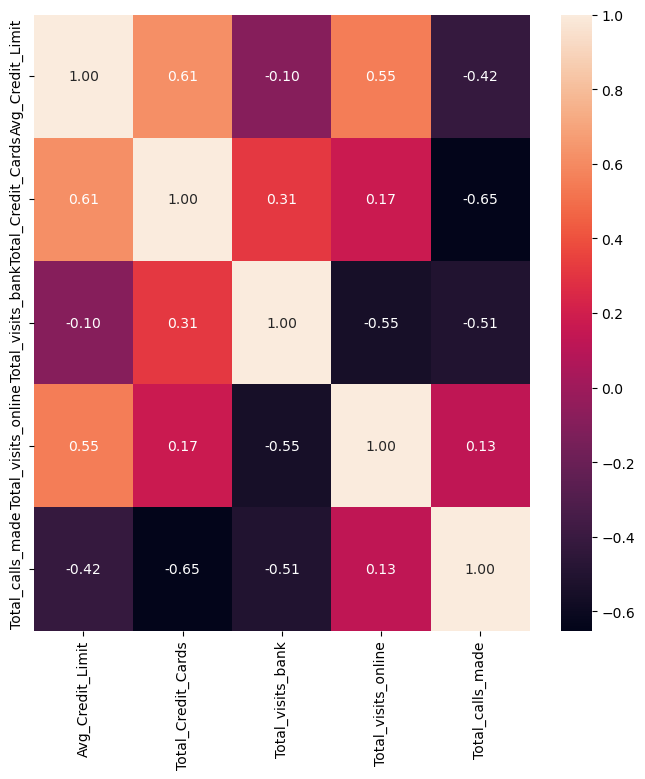

In [29]:
plt.figure(figsize = (8, 8))

sns.heatmap(df.corr(), annot = True, fmt = '0.2f')

plt.show()

**Observations:**
The average credit limit shows a positive correlation with the total number of credit cards and online visits, indicating that customers with higher credit limits tend to have more cards and engage more with online banking services. Conversely, there's a negative correlation between the average credit limit and both the number of calls made and bank visits, suggesting that customers with higher limits may prefer digital interactions over traditional bank visits or telephone calls. Additionally, the negative correlation among bank visits, online visits, and calls made suggests that customers typically favor one mode of communication with the bank.

#### **Scaling the data**

In [30]:
scaler = StandardScaler()

# Standardizing the data to have a mean of ~0 and a variance of 1
data_scaled = StandardScaler().fit_transform(df)

data_scaled

array([[ 1.75019153, -1.23943654, -0.85868369, -0.54957262, -1.25398247],
       [ 0.41328003, -0.77938056, -1.47380305,  2.49566917,  1.8734196 ],
       [ 0.41328003,  1.06084338, -0.85868369,  0.12714778,  0.135974  ],
       ...,
       [ 2.95341188,  1.52089937, -0.85868369,  2.15730897, -0.90649335],
       [ 3.67534409,  2.44101134, -0.85868369,  4.18747017, -1.25398247],
       [ 3.54165294,  1.98095535, -1.47380305,  3.17238957, -0.55900423]])

#### **Applying PCA on scaled data**

In [34]:
from sklearn.decomposition import PCA

n = df.shape[1]

pca = PCA(n_components=n)

principal_components = pca.fit_transform(data_scaled)

data_pca = pd.DataFrame(principal_components, columns = df.columns)

data_copy = data_pca.copy(deep = True)

## **K-Means**

Let us now fit the K-means algorithm on our pca components and find out the optimum number of clusters to use.

We will do this in 3 steps:
1. Initialize a dictionary to store the Sum of Squared Error (SSE) for each K
2. Run for a range of Ks and store SSE for each run
3. Plot the SSE vs K and plot the elbow curve

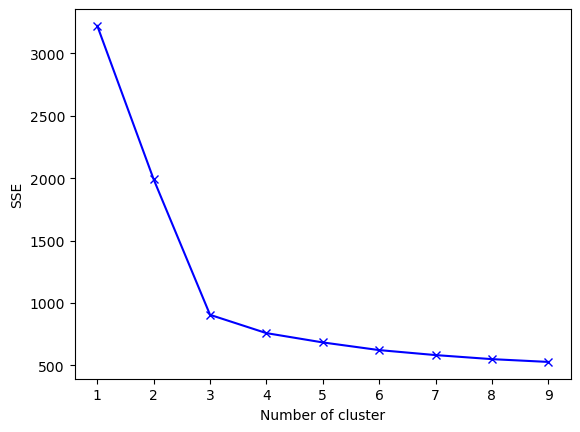

In [35]:
sse = {} 

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 1000, random_state = 1).fit(data_pca)
    sse[k] = kmeans.inertia_    


plt.figure()

plt.plot(list(sse.keys()), list(sse.values()), 'bx-')

plt.xlabel("Number of cluster")

plt.ylabel("SSE")

plt.show()

- Interpret the above elbow plot and state the reason for choosing the particular value of K
- Fit the K-means algorithms on the pca components with the number of clusters for the chosen value of K

In [36]:
k_optimal = 3  


kmeans_optimal = KMeans(n_clusters=k_optimal, max_iter=1000, random_state=1)


kmeans_optimal.fit(data_pca)


data_copy['Labels'] = kmeans_optimal.labels_
df['Labels'] = kmeans_optimal.labels_

#### **Create the cluster profiles using the summary statistics and box plots for each label**

In [37]:
df.Labels.value_counts()

1    374
0    221
2     49
Name: Labels, dtype: int64

In [38]:
mean = df.groupby('Labels').mean()

median = df.groupby('Labels').median()

df_kmeans = pd.concat([mean, median], axis = 0)

df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12239.819005,33893.048128,140102.040816,12000.0,31500.0,145000.0
Total_Credit_Cards,2.411765,5.508021,8.775510,2.0,6.0,9.0
Total_visits_bank,0.945701,3.489305,0.591837,1.0,3.0,1.0
Total_visits_online,3.561086,0.975936,10.979592,4.0,1.0,11.0
Total_calls_made,6.891403,1.997326,1.102041,7.0,2.0,1.0


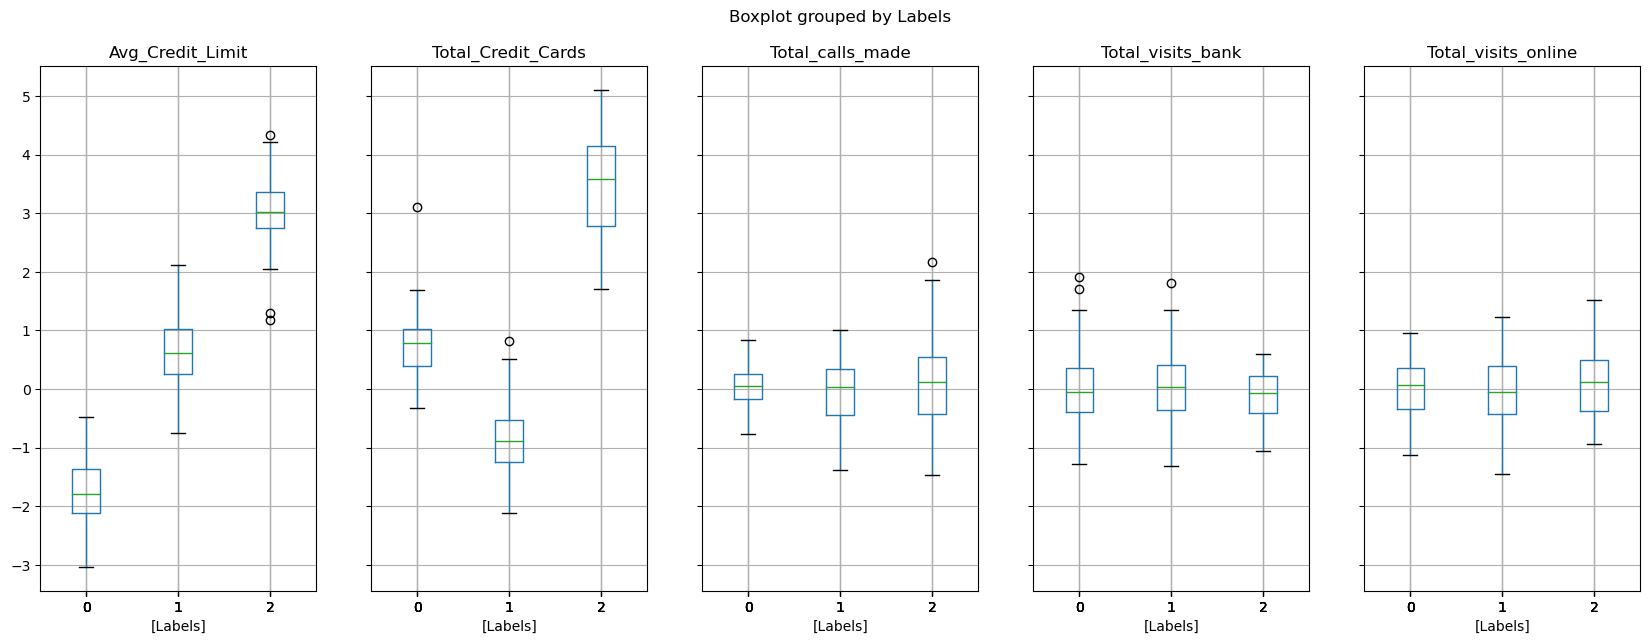

In [39]:
data_copy.boxplot(by = 'Labels', layout = (1, 5), figsize = (20, 7))

plt.show()

**Cluster Profiles:**

**Avg_Credit_Limit:**

Cluster 1: Has the lowest average credit limit, with a median near 0 of the standardized scale, indicating that this cluster consists of customers with lower credit limits.
Cluster 2: Displays a higher average credit limit than Cluster 0, with a median around 1 on the standardized scale.
Cluster 3: Features the highest average credit limits, with a median greater than 2 on the standardized scale, suggesting these customers have the highest credit limits.

**Total_Credit_Cards:**

Cluster 1: Customers in this cluster have the lowest number of credit cards, with the median around 1 standardized unit.
Cluster 2: This cluster has a median around 2 standardized units, indicating a higher number of credit cards compared to Cluster 0.
Cluster 3: Has a slightly lower median number of credit cards than Cluster 1, with more variation as indicated by the longer box and outliers.


**Total_calls_made:**

The box plots for this variable are not visible in the provided image. If there's data, it would show the distribution of the number of calls made by customers in each cluster.


**Total_visits_bank:**

Cluster 1: Has a median of total bank visits around 1 standardized unit, with a few outliers indicating that some customers in this cluster visit the bank significantly more than the average.
Cluster 2: Similar to Cluster 0, it also has a median of total bank visits around 1 standardized unit, with outliers.
Cluster 3: Appears to have a median of bank visits that is slightly higher than Cluster 0 and 1.

**Total_visits_online:**

Cluster 1: This cluster has the lowest median of online visits, indicating these customers prefer other channels over online for interacting with the bank.
Cluster 2: Has a higher median number of online visits compared to Cluster 0, suggesting these customers use online services more frequently.
Cluster 3: Has a median similar to Cluster 1 but with a wider range and more outliers, indicating greater variability in the frequency of online visits among these customers.


Overall, these clusters seem to represent different customer behaviors in terms of credit limit, number of credit cards, and banking habits (both in person and online), with Cluster 2 representing customers with higher credit limits, Cluster 1 being moderate, and Cluster 0 on the lower end of credit limits. The actual values of these limits and the number of credit cards or visits would need to be interpreted in the context of the data's scaling and transformation applied before clustering.**

## **Gaussian Mixture Model**

Let's now create clusters using the Gaussian Mixture Model.

- Apply the Gaussian Mixture Model algorithm on the pca components

In [40]:
gmm = GaussianMixture(n_components=3, random_state=1)  

gmm.fit(data_pca)    

data_copy['GmmLabels'] = gmm.predict(data_pca)

df['GmmLabels'] = gmm.predict(data_pca)

#### **Create the cluster profiles using the summary statistics and box plots for each label**


In [41]:
df.GmmLabels.value_counts()

1    374
0    221
2     49
Name: GmmLabels, dtype: int64

#### **Compare the clusters from both algorithms - K-means and Gaussian Mixture Model**

In [42]:
original_features = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made"]

mean = df.groupby('GmmLabels').mean()

median = df.groupby('GmmLabels').median()

df_gmm = pd.concat([mean, median], axis = 0)

df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_gmm[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12239.819005,33893.048128,140102.040816,12000.0,31500.0,145000.0
Total_Credit_Cards,2.411765,5.508021,8.775510,2.0,6.0,9.0
Total_visits_bank,0.945701,3.489305,0.591837,1.0,3.0,1.0
Total_visits_online,3.561086,0.975936,10.979592,4.0,1.0,11.0
Total_calls_made,6.891403,1.997326,1.102041,7.0,2.0,1.0


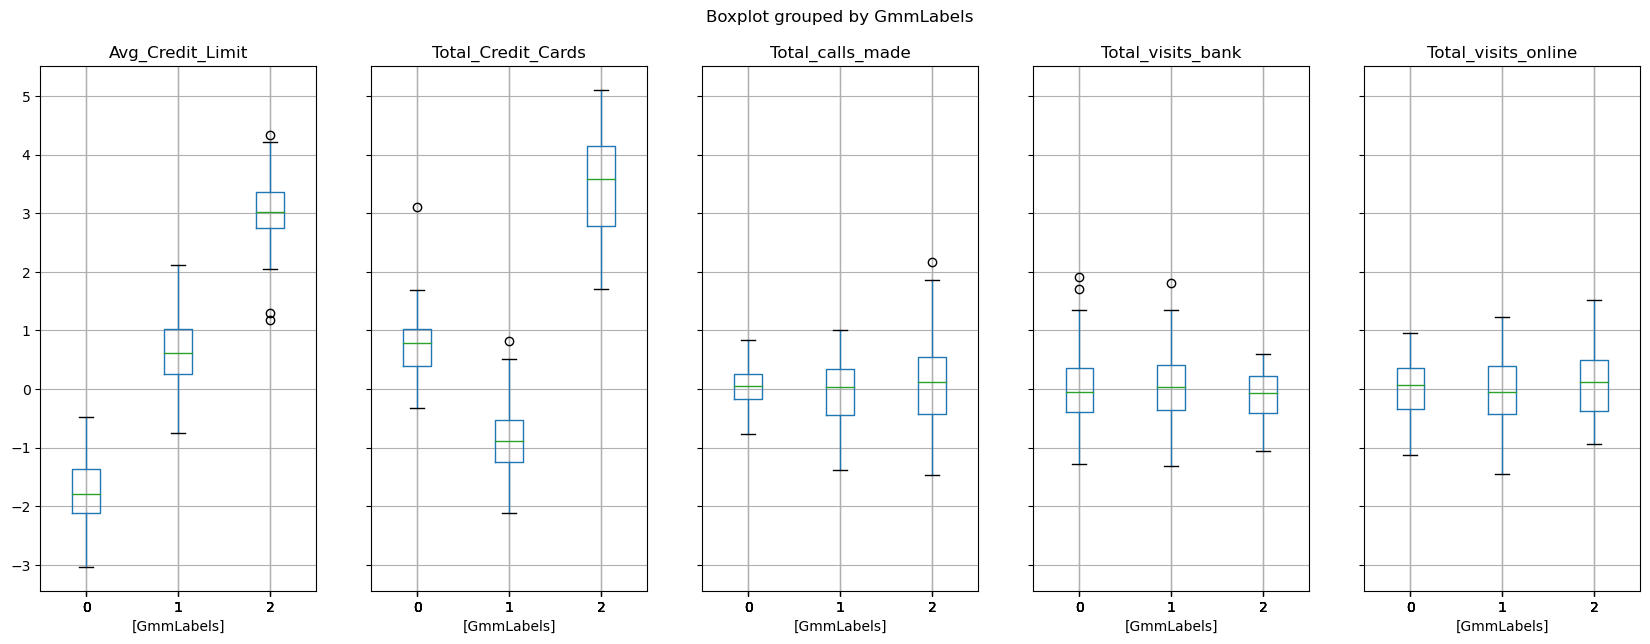

In [43]:
features_with_lables = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made", "GmmLabels"]

data_copy[features_with_lables].boxplot(by = 'GmmLabels', layout = (1, 5),figsize = (20, 7))

plt.show()

**Comparing Clusters:** It has the same clusters as in Kmeans.

## **K-Medoids**



- Apply the K-Medoids clustering algorithm on the pca components

In [44]:
kmedo = KMedoids(n_clusters=3, random_state=1)   

kmedo.fit(data_pca)       

data_copy['kmedoLabels'] = kmedo.predict(data_pca)

df['kmedoLabels'] = kmedo.predict(data_pca)

#### **Create cluster profiles using the summary statistics and box plots for each label**

In [45]:
df.kmedoLabels.value_counts()

2    289
0    222
1    133
Name: kmedoLabels, dtype: int64

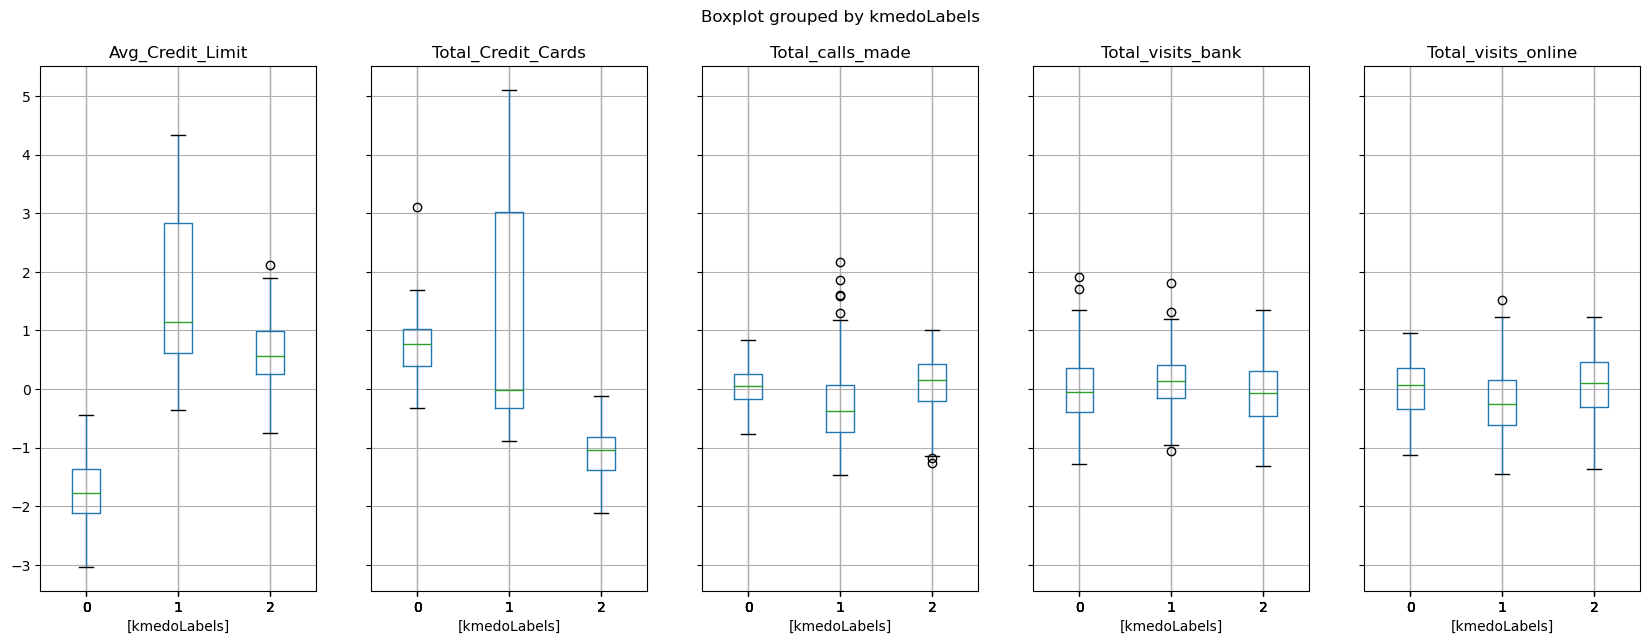

In [46]:
# Calculating summary statistics of the original data for each label
mean = df.groupby('kmedoLabels').mean()

median = df.groupby('kmedoLabels').median()

df_kmedoids = pd.concat([mean, median], axis = 0)

df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmedoids[original_features].T

# Plotting boxplots with the new K-Medoids based labels

features_with_lables = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made", "kmedoLabels"]

data_copy[features_with_lables].boxplot(by = 'kmedoLabels', layout = (1, 5), figsize = (20, 7))

plt.show()

**Cluster Profiles:**

**Avg_Credit_Limit:**

Cluster 1: Has the lowest average credit limit, with a median significantly below 0 on the standardized scale.
Cluster 2: Shows a median average credit limit around 2 on the standardized scale, indicating higher limits.
Cluster 3: Has a median around 1, suggesting moderately high credit limits.

**Total_Credit_Cards:**

Cluster 1: Has fewer credit cards with a median around 0.
Cluster 2: Shows a higher median, around 3 on the scale, suggesting a greater number of cards.
Cluster 3: Has a median similar to Cluster 0, but with a tighter interquartile range.

**Total_calls_made:**

Cluster 1: Displays a median number of calls made around 0, with a few outliers indicating some customers make more calls.
Cluster 2: Shows a lower median, suggesting fewer calls made by this group.
Cluster 3: Has a median around 1, indicating a higher tendency to make calls than the other two clusters.

**Total_visits_bank:**

Cluster 1: Shows a median number of bank visits around 0, with a tight interquartile range.
Cluster 2: Has a higher median, above 1, suggesting more frequent bank visits.
Cluster 3: Has a median similar to Cluster 0 but with more variation.

**Total_visits_online:**

Cluster 1: Has the lowest median for online visits, suggesting less online engagement.
Cluster 2: Shows a higher median, indicating more frequent online visits.
Cluster 3: Has a median similar to Cluster 0, with a slightly wider interquartile range.

**In summary, based on the K-Medoids clustering:**

Cluster 1 seems to represent customers with higher credit limits, a greater number of credit cards, and a higher frequency of bank and online visits.
Cluster 0 and 2 are somewhat similar in terms of credit limits and the number of credit cards but differ in their communication preferences, with Cluster 2 engaging more via calls.


#### **Compare the clusters from K-Means and K-Medoids** 

In [47]:
comparison = pd.concat([df_kmedoids, df_kmeans], axis = 1)[original_features]

comparison

,Avg_Credit_Limit,Avg_Credit_Limit,Total_Credit_Cards,Total_Credit_Cards,Total_visits_bank,Total_visits_bank,Total_visits_online,Total_visits_online,Total_calls_made,Total_calls_made
group_0 Mean,12216.216216,12239.819005,2.423423,2.411765,0.950450,0.945701,3.554054,3.561086,6.878378,6.891403
group_1 Mean,85052.631579,33893.048128,7.030075,5.508021,1.691729,3.489305,4.639098,0.975936,1.969925,1.997326
group_2 Mean,28449.826990,140102.040816,5.363322,8.775510,3.830450,0.591837,0.982699,10.979592,1.851211,1.102041
group_0 Median,12000.000000,12000.000000,2.000000,2.000000,1.000000,1.000000,4.000000,4.000000,7.000000,7.000000
group_1 Median,68000.000000,31500.000000,7.000000,6.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000
group_2 Median,20000.000000,145000.000000,5.000000,9.000000,4.000000,1.000000,1.000000,11.000000,2.000000,1.000000


**Comparing Clusters:**

Overall Differences:
K-Means tends to show a greater spread in data points (larger interquartile ranges) compared to K-Medoids, which suggests that K-Means clusters have more variability within them.
K-Medoids tends to have more compact clusters, which is characteristic of the algorithm as it minimizes the sum of pairwise dissimilarities instead of the sum of squared Euclidean distances as in K-Means.
The medians of the clusters in K-Means and K-Medoids are similar across the variables, but the variability within each cluster and the outliers differ, indicating a difference in how the two algorithms group the data points.
The differences might be due to the intrinsic properties of these algorithms: K-Means is sensitive to outliers as it tries to minimize the variance within clusters, while K-Medoids is more robust to outliers as it uses medoids to represent the center of a cluster.

## **Conclusions and Business Recommendations**

**1) Customer Segmentation for Personalized Campaigns**

Cluster 1 (Lower Credit Limit and Engagement): This group represents an opportunity for market penetration by offering entry-level credit cards or improving credit limits, aligned with their financial profile. Personalized campaigns could focus on the benefits of credit building and special starter offers.

Cluster 2 (Moderate to High Credit Limit and High Engagement): These customers are likely to respond well to upselling strategies. They could be offered premium cards with additional benefits, rewards for online transactions, or increased credit limits to encourage more spending.

Cluster 3 (High Credit Limit, Varied Engagement): Since this cluster includes customers who make more calls, they might be experiencing service issues or could prefer human interaction. Offering them dedicated support and exclusive services could enhance their perception of the bank.

**2) Improving Customer Support Services**

Response to Service Queries: Customers from Cluster 2 are making more calls, possibly indicating service issues. The bank should investigate whether these calls are service-related and, if so, improve the resolution process.

Service Delivery Model: Given that customers have perceived support services poorly, the bank could consider introducing more robust online service options, as Cluster 1 shows high online engagement. Implementing chatbots and AI-driven tools could help resolve common queries quickly.

Customer Education: For customers in Cluster 0 with lower online engagement, there's an opportunity to educate them on using digital channels, which could improve their service experience and reduce call volumes.

**3) Strategic Recommendations**

Enhance Digital Channels:Strengthen online banking tools and resources to cater to the digitally savvy customer base (Cluster 1), and reduce the load on call centers.

Improve Call Center Services: For customers who prefer or need to call (Cluster 2), enhance call center efficiency through better staff training and possibly, tiered support levels.

Cross-Sell Products: Use the clustering data to identify cross-sell opportunities, such as offering savings products or investment services to customers with higher credit limits (Clusters 1 and 2).

Customer Retention: Implement loyalty programs or benefits for long-standing customers, especially in the higher credit limit segments, to increase retention.

By aligning marketing and service delivery upgrades with these customer segment's behaviors and preferences, AllLife Bank can aim to increase market penetration and improve customer satisfaction. Additionally, it would be beneficial to periodically reevaluate customer segmentation to track the effectiveness of implemented strategies and adapt to changes in customer behavior.